To apply K-Means clustering to the data, we first need to decide on the number of clusters. A common method for choosing the number of clusters is the Elbow Method, which involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for the 'elbow point' where the rate of decrease sharply changes.

Given the dataset includes the percentage of renewable energy produced, consumed, and their difference for each state, we'll use these features for clustering.

Let's start by finding the optimal number of clusters using the Elbow Method, and then we can perform K-Means clustering on the data.

In [369]:
import pandas as pd

# Data for renewable produced
data_produced = {
    "State": ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY",
              "LA", "MA", "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH",
              "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV", "WY"],
    "percentage_renewable_produced": [28.19, 10.74, 8.89, 13.43, 41.05, 32.7, 3.43, 35.05, 3.15, 5.46, 11.47, 19.02, 57.29,
                                      70.22, 11.09, 9.82, 45.63, 7.63, 3.44, 17.78, 9.52, 66.11, 9.62, 27.2, 11.01, 2.65,
                                      51.29, 14.22, 39.33, 28.67, 14.32, 3.26, 35.6, 30.74, 28.53, 3.56, 44.1, 65.04,
                                      3.27, 7.17, 6.16, 82.75, 14.37, 24.23, 12.45, 7.68, 99.66, 74.22, 8.05, 5.07, 21.67]
}

# Data for renewable consumed
data_consumed = {
    "State": ["AK", "AL", "AR", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "IA", "ID", "IL", "IN", "KS", "KY",
              "LA", "MA", "MD", "ME", "MI", "MN", "MO", "MS", "MT", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NY", "OH",
              "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VA", "VT", "WA", "WI", "WV", "WY"],
    "percentage_renewable_consumed": [3.777823, 14.368555, 10.89512, 12.462193, 24.971704, 17.037742, 6.667053, 7.322126,
                                       3.958546, 9.218447, 14.747798, 14.89545, 56.564959, 44.6264, 8.927303, 9.089164,
                                       29.468733, 6.829926, 3.641978, 11.38433, 7.680295, 59.706687, 9.660165, 21.007942,
                                       9.255427, 5.996043, 34.851107, 13.129472, 25.689008, 30.332081, 16.3684, 4.893346,
                                       20.372354, 22.356375, 16.329976, 5.365144, 26.300629, 71.389253, 5.34341, 7.989542,
                                       10.775357, 86.169664, 11.528851, 10.002413, 7.965799, 10.195405, 46.719428,
                                       69.659413, 12.045649, 4.361642, 13.419652]
}

# Convert to DataFrames
df_produced = pd.DataFrame(data_produced)
df_consumed = pd.DataFrame(data_consumed)

# Merge on State
df_combined = pd.merge(df_produced, df_consumed, on="State")

# Calculate difference
df_combined["Difference"] = df_combined["percentage_renewable_produced"] - df_combined["percentage_renewable_consumed"]

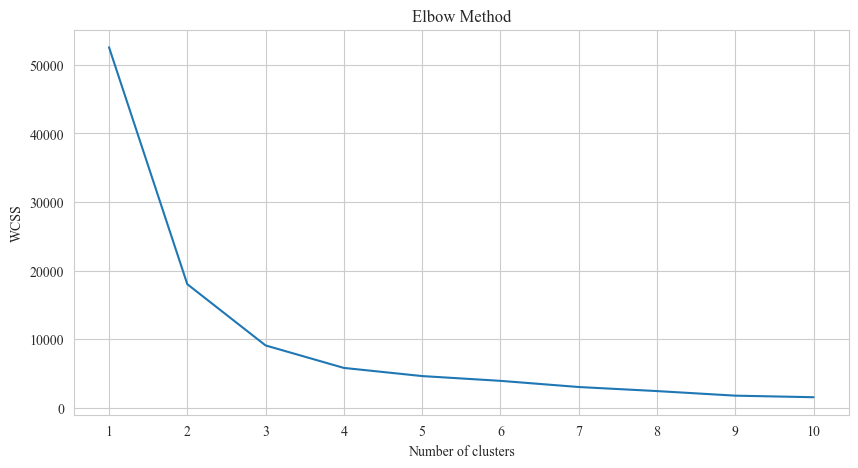

In [370]:
from sklearn.cluster import KMeans
import numpy as np

# Extract relevant data for clustering
X = df_combined[['percentage_renewable_produced', 'percentage_renewable_consumed', 'Difference']].values

# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'elbow'
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Here we will use the elbow value of 4, and see how they cluster.

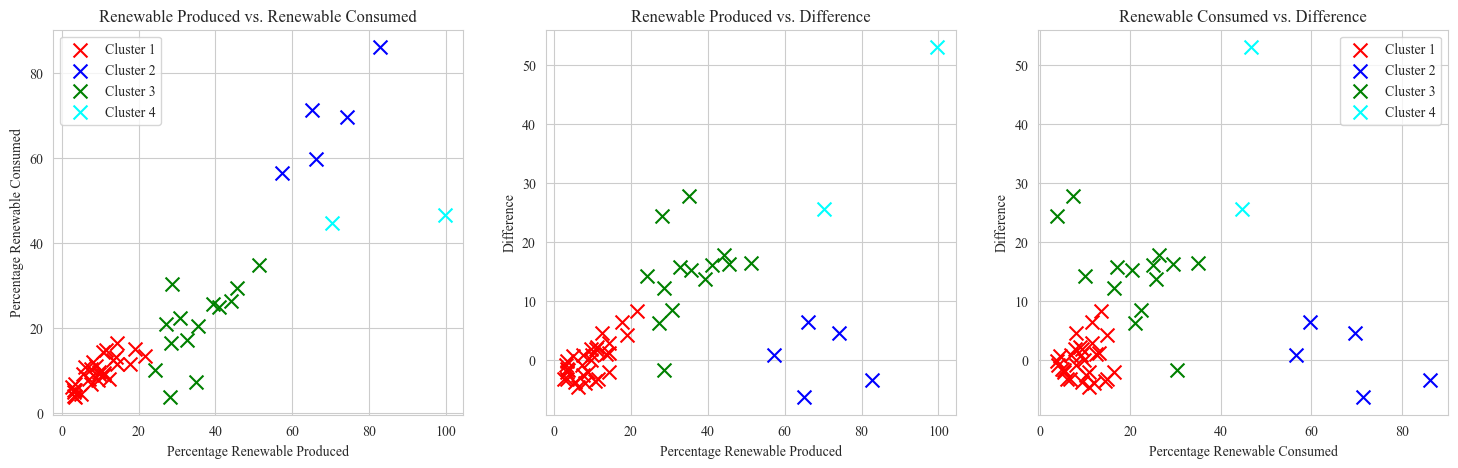

In [371]:
# Applying K-Means Clustering with 4 clusters based on the user's choice

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster information to the DataFrame
df_combined['Cluster'] = y_kmeans

# Visualizing the clusters - this time we'll plot three graphs to see how the clusters are formed based on:
# 1. Percentage Renewable Produced vs. Percentage Renewable Consumed
# 2. Percentage Renewable Produced vs. Difference
# 3. Percentage Renewable Consumed vs. Difference

plt.figure(figsize=(18, 5))

# Percentage Renewable Produced vs. Percentage Renewable Consumed
plt.subplot(1, 3, 1)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1', marker='x')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', marker='x')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3', marker='x')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4', marker='x')
plt.title('Renewable Produced vs. Renewable Consumed')
plt.xlabel('Percentage Renewable Produced')
plt.ylabel('Percentage Renewable Consumed')
plt.legend()

# Percentage Renewable Produced vs. Difference
plt.subplot(1, 3, 2)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1', marker='x')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2', marker='x')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3', marker='x')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4', marker='x')
plt.title('Renewable Produced vs. Difference')
plt.xlabel('Percentage Renewable Produced')
plt.ylabel('Difference')

# Percentage Renewable Consumed vs. Difference
plt.subplot(1, 3, 3)
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1', marker='x')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2', marker='x')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3', marker='x')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4', marker='x')
plt.title('Renewable Consumed vs. Difference')
plt.xlabel('Percentage Renewable Consumed')
plt.ylabel('Difference')

plt.legend()
plt.show()

Looks like the grouping on Percentage Renewable Produced vs. Percentage Renewable Consumed is the most logical. Let's try some statistical analysis.

In [372]:
# Reverting to 4-cluster configuration for detailed analysis
df_combined['Cluster'] = y_kmeans

# Calculate the mean values for each cluster
cluster_means = df_combined.groupby('Cluster')[['percentage_renewable_produced', 'percentage_renewable_consumed', 'Difference']].mean()

# List states in each cluster
states_in_clusters = df_combined.groupby('Cluster')['State'].apply(list)

cluster_means, states_in_clusters

(         percentage_renewable_produced  percentage_renewable_consumed  \
 Cluster                                                                 
 0                             9.313333                       9.435315   
 1                            69.082000                      68.697995   
 2                            35.165000                      20.701429   
 3                            84.940000                      45.672914   
 
          Difference  
 Cluster              
 0         -0.121982  
 1          0.384005  
 2         14.463570  
 3         39.267086  ,
 Cluster
 0    [AL, AR, AZ, CT, DE, FL, GA, HI, IL, IN, KY, L...
 1                                 [IA, ME, OR, SD, WA]
 2    [AK, CA, CO, DC, KS, MN, MT, ND, NE, NM, NV, N...
 3                                             [ID, VT]
 Name: State, dtype: object)

Cluster 1 has an average of 9.31% renewable energy produced and 9.44% consumed with a nearly balanced difference of -0.12%. This cluster consists of states with relatively low renewable energy production and consumption, closely matched in terms of production and consumption rates.

Includes states like AL, AR, AZ, CT, DE, FL, GA, HI, IL, IN, KY, LA, MA, MD, MI, MO, NC, NJ, NY, OH, PA, RI, SC, TN, TX, UT, VA, WI, WV – predominantly states with lower renewable energy figures.

Cluster 2 shows higher levels of both production and consumption, with averages of 69.08% produced and 68.70% consumed, leading to a small positive difference of 0.38%. This cluster includes states with high renewable energy utilization.

Consists of IA, ME, OR, SD, WA – states known for high levels of renewable energy production and consumption.

Cluster 3 has an average production of 35.17% and consumption of 20.70%, with a more substantial positive difference of 14.46%. This cluster includes states with significant renewable energy production exceeding their consumption.

Comprises AK, CA, CO, DC, KS, MN, MT, ND, NE, NM, NV, NY, OK, WY – states with notable renewable production exceeding consumption.

Cluster 4, the most distinct cluster with only 2 states, shows extremely high production at 84.94% and consumption at 45.67%, with a very large difference of 39.27%. This includes states with exceptionally high renewable energy production relative to their consumption.

Includes ID and VT, states with exceptionally high renewable energy production compared to their consumption.

Let's look at silhouette score for clustering analysis.

In [373]:
from sklearn.metrics import silhouette_score

# Assuming that 'X' is the feature matrix and 'df_combined['Cluster']' are the predicted cluster labels
score = silhouette_score(X, df_combined['Cluster'])

print('Silhouette Score: ', score)

Silhouette Score:  0.607040149621084


A silhouette score above 0.5 indicates good clustering. Ours is roughly 0.61. Next, let's graph this with centroids.

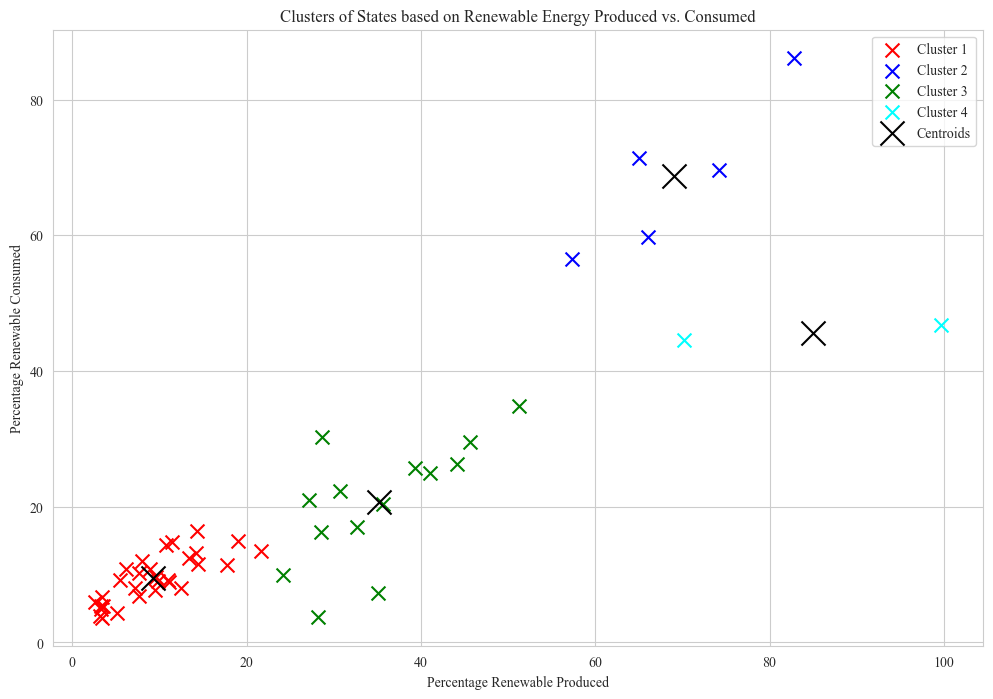

In [374]:
plt.figure(figsize=(12, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1', marker='x')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2', marker='x')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3', marker='x')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4', marker='x')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids', marker='x')
plt.title('Clusters of States based on Renewable Energy Produced vs. Consumed')
plt.xlabel('Percentage Renewable Produced')
plt.ylabel('Percentage Renewable Consumed')
plt.legend()
plt.show()

Applying ANOVA (Analysis of Variance) to the dataset can help us understand if the differences in renewable energy production, consumption, or the difference between produced and consumed renewable energy are statistically significant across the clusters identified by the K-Means clustering.

Specifically, we can perform a one-way ANOVA for each of the following scenarios:

1. To test if the mean percentage of renewable energy produced differs significantly across the four clusters.

2. To test if the mean percentage of renewable energy consumed differs significantly across the four clusters.

3. To test if the mean difference between produced and consumed renewable energy differs significantly across the four clusters.

In [375]:
from scipy import stats

# Perform one-way ANOVA for each metric
f_val_produced, p_val_produced = stats.f_oneway(df_combined[df_combined['Cluster'] == 0]['percentage_renewable_produced'],
                                                df_combined[df_combined['Cluster'] == 1]['percentage_renewable_produced'],
                                                df_combined[df_combined['Cluster'] == 2]['percentage_renewable_produced'],
                                                df_combined[df_combined['Cluster'] == 3]['percentage_renewable_produced'])

f_val_consumed, p_val_consumed = stats.f_oneway(df_combined[df_combined['Cluster'] == 0]['percentage_renewable_consumed'],
                                                df_combined[df_combined['Cluster'] == 1]['percentage_renewable_consumed'],
                                                df_combined[df_combined['Cluster'] == 2]['percentage_renewable_consumed'],
                                                df_combined[df_combined['Cluster'] == 3]['percentage_renewable_consumed'])

f_val_difference, p_val_difference = stats.f_oneway(df_combined[df_combined['Cluster'] == 0]['Difference'],
                                                    df_combined[df_combined['Cluster'] == 1]['Difference'],
                                                    df_combined[df_combined['Cluster'] == 2]['Difference'],
                                                    df_combined[df_combined['Cluster'] == 3]['Difference'])

(p_val_produced, p_val_consumed, p_val_difference)

(4.0969644719378904e-25, 7.256398260199542e-23, 1.9695642841435284e-14)

In all cases, the p-values are significantly less than 0.05, indicating that there are statistically significant differences in the means of renewable energy production, consumption, and the difference between production and consumption across the four clusters.

This means that the clusters identified through K-Means clustering are distinct not only in their membership but also in their renewable energy metrics. This could reflect varying levels of renewable energy infrastructure, policies, and natural resource availability across the clusters.

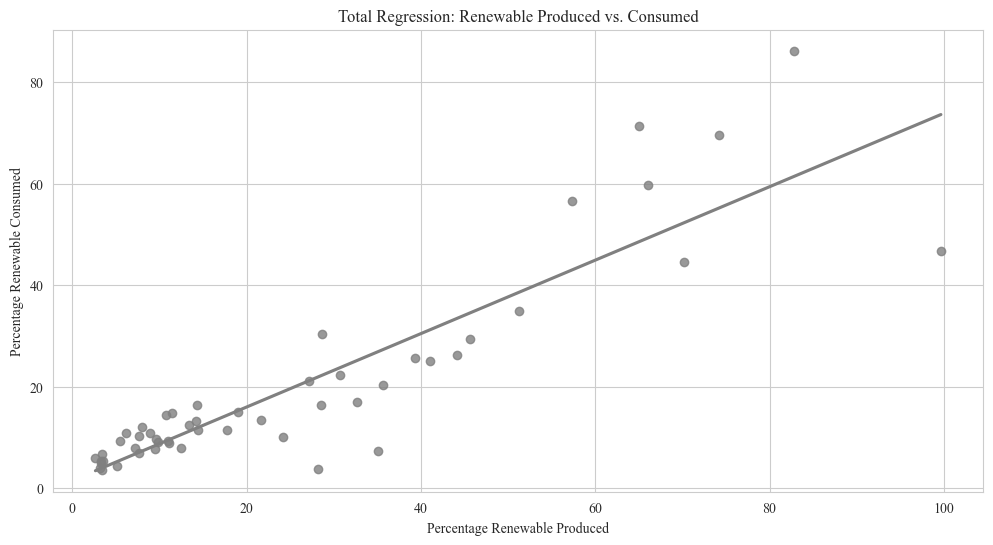

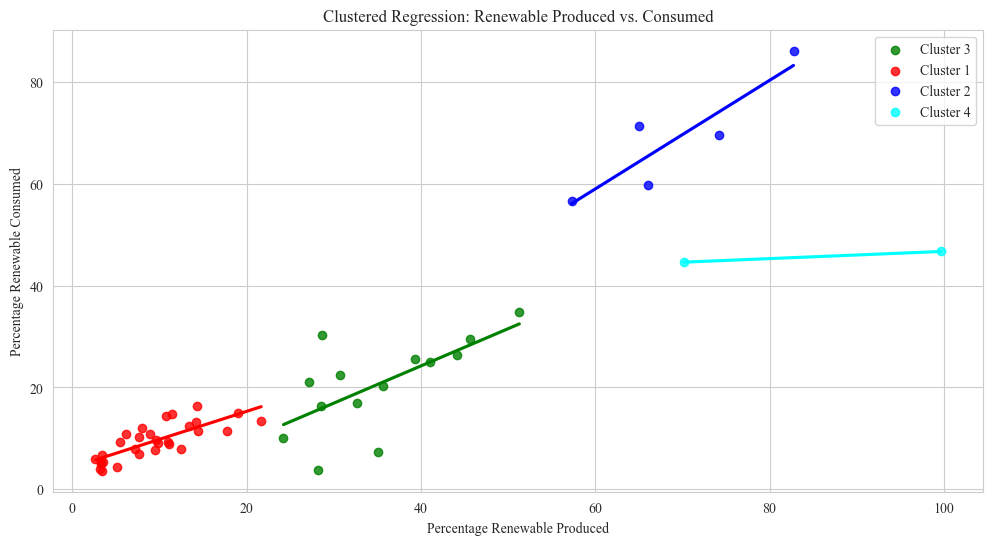

In [376]:
import seaborn as sns

# Plotting the total regression across all data
plt.figure(figsize=(12, 6))
sns.regplot(x="percentage_renewable_produced", y="percentage_renewable_consumed", data=df_combined, ci=None, color='grey')
plt.title('Total Regression: Renewable Produced vs. Consumed')
plt.xlabel('Percentage Renewable Produced')
plt.ylabel('Percentage Renewable Consumed')
plt.show()

# Plotting regression lines for each cluster
plt.figure(figsize=(12, 6))

# Defining colors for each cluster for consistency with previous visualizations
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'cyan'}

for cluster in df_combined['Cluster'].unique():
    cluster_data = df_combined[df_combined['Cluster'] == cluster]
    sns.regplot(x="percentage_renewable_produced", y="percentage_renewable_consumed", data=cluster_data, ci=None, color=colors[cluster], label=f'Cluster {cluster+1}')

plt.title('Clustered Regression: Renewable Produced vs. Consumed')
plt.xlabel('Percentage Renewable Produced')
plt.ylabel('Percentage Renewable Consumed')
plt.legend()
plt.show()


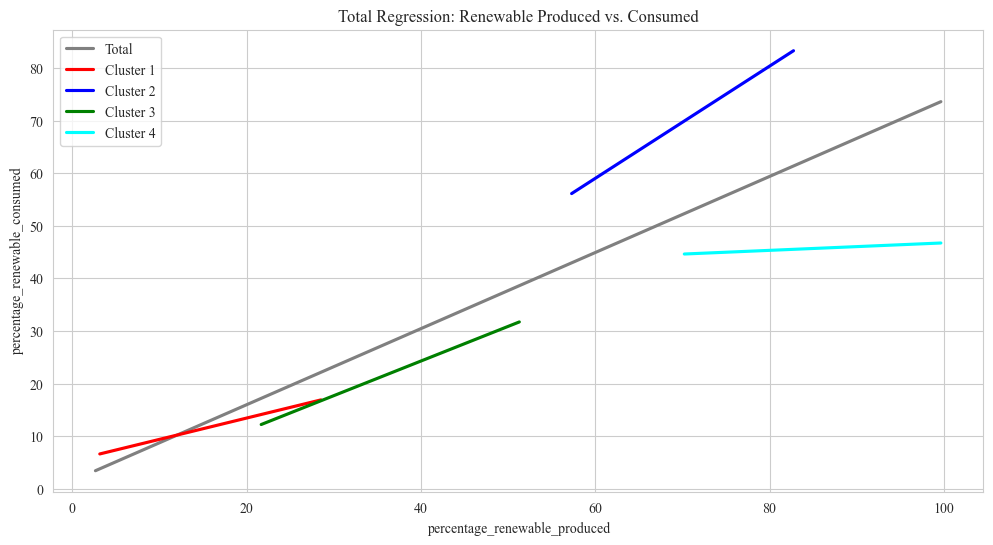

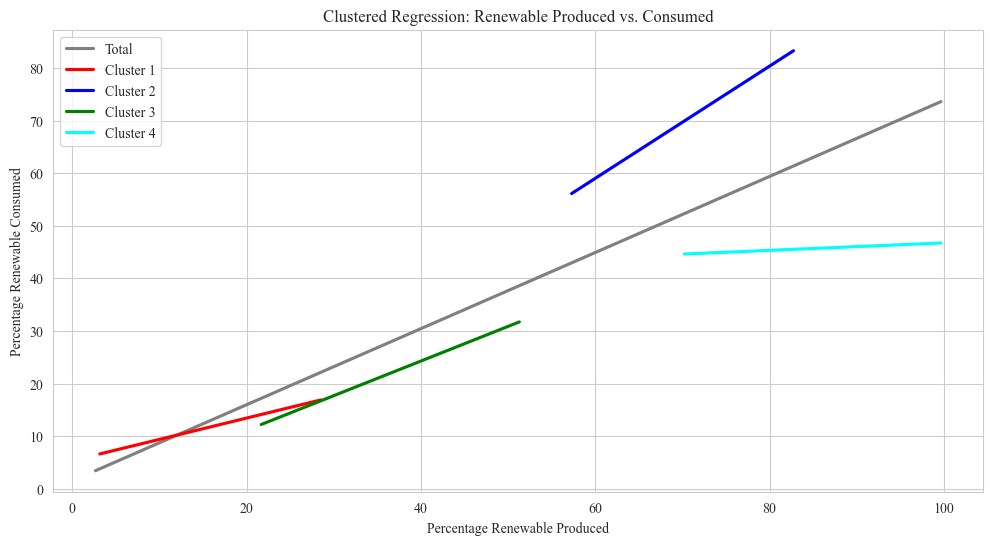

In [377]:
# Mapping states to their given clusters as specified
cluster_map = {
    'Cluster 1': ['AL', 'AR', 'AZ', 'CT', 'DE', 'FL', 'GA', 'HI', 'IL', 'IN', 'KY', 'LA', 'MA', 'MD', 'MI', 'MO', 'NC', 'NJ', 'NY', 'OH', 'PA', 'RI', 'SC', 'TN', 'TX', 'UT', 'VA', 'WI', 'WV'],
    'Cluster 2': ['IA', 'ME', 'OR', 'SD', 'WA'],
    'Cluster 3': ['AK', 'CA', 'CO', 'DC', 'KS', 'MN', 'MT', 'ND', 'NE', 'NM', 'NV', 'OK', 'WY'],
    'Cluster 4': ['ID', 'VT']
}

# Assign clusters to DataFrame based on the pre-given cluster information
def assign_cluster(state):
    for cluster_name, states in cluster_map.items():
        if state in states:
            return cluster_name[-1]  # Extract the cluster number from the cluster name
    return '0'  # Return '0' when state is not found in any cluster

df_combined['Pre_Given_Cluster'] = df_combined['State'].apply(assign_cluster).astype(int)

# Total regression across all data
plt.figure(figsize=(12, 6))
sns.regplot(x="percentage_renewable_produced", y="percentage_renewable_consumed", data=df_combined, ci=None, color='grey', scatter=False, label="Total")
plt.title('Total Regression: Renewable Produced vs. Consumed')
plt.xlabel('Percentage Renewable Produced')
plt.ylabel('Percentage Renewable Consumed')

# Regression lines for each cluster using the pre-given cluster assignments
colors = ['red', 'blue', 'green', 'cyan']
for i, color in enumerate(colors, start=1):
    cluster_data = df_combined[df_combined['Pre_Given_Cluster'] == i]
    sns.regplot(x="percentage_renewable_produced", y="percentage_renewable_consumed", data=cluster_data, ci=None, color=color, scatter=False, label=f'Cluster {i}')

plt.legend()
plt.show()


# Correcting the error in assigning clusters and converting to integer
# The error was due to the function returning None for some states, which cannot be converted to int
# Ensuring all states have a valid cluster assignment before conversion

df_combined['Pre_Given_Cluster'] = df_combined['State'].apply(assign_cluster)

# Now plotting the regressions using the corrected cluster assignments
plt.figure(figsize=(12, 6))
# Plotting total regression across all data
sns.regplot(x="percentage_renewable_produced", y="percentage_renewable_consumed", data=df_combined, ci=None, color='grey', scatter=False, label="Total")

# Plotting regression lines for each pre-given cluster
for cluster_number, color in zip(['1', '2', '3', '4'], ['red', 'blue', 'green', 'cyan']):
    cluster_data = df_combined[df_combined['Pre_Given_Cluster'] == cluster_number]
    sns.regplot(x="percentage_renewable_produced", y="percentage_renewable_consumed", data=cluster_data, ci=None, color=color, scatter=False, label=f'Cluster {cluster_number}')

plt.title('Clustered Regression: Renewable Produced vs. Consumed')
plt.xlabel('Percentage Renewable Produced')
plt.ylabel('Percentage Renewable Consumed')
plt.legend()
plt.show()


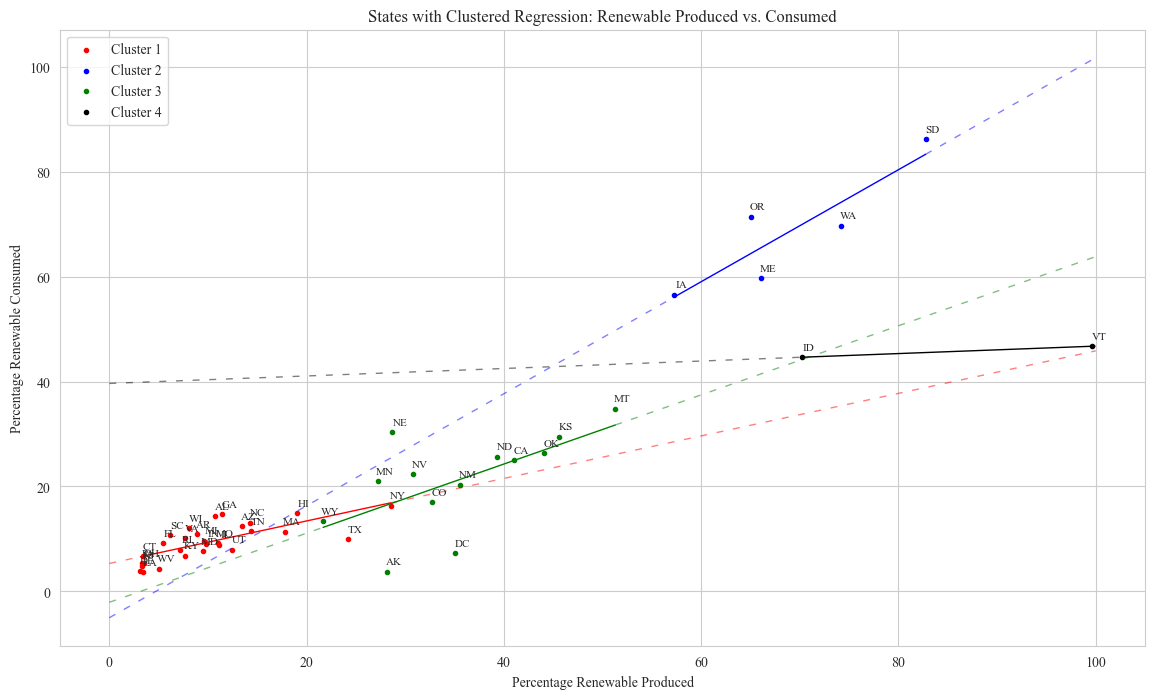

In [378]:
import numpy as np
import matplotlib.pyplot as plt

# Set the font to Times New Roman
plt.rc('font', family='Times New Roman')

# Plotting with individual states' data points along with regression lines
plt.figure(figsize=(14, 8))

# Scatter plot for all clusters with their specific colors
for cluster_number, color in zip(['1', '2', '3', '4'], ['red', 'blue', 'green', 'black']):
    cluster_data = df_combined[df_combined['Pre_Given_Cluster'] == cluster_number]
    plt.scatter(cluster_data["percentage_renewable_produced"], cluster_data["percentage_renewable_consumed"], color=color, label=f'Cluster {cluster_number}', alpha=1.0, marker='.')

    # Annotate each state in the cluster
    for state, x, y in zip(cluster_data["State"], cluster_data["percentage_renewable_produced"], cluster_data["percentage_renewable_consumed"]):
        plt.annotate(state, (x, y), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8)

# Plotting regression lines for each pre-given cluster without the scatter to avoid duplication
for cluster_number, color in zip(['1', '2', '3', '4'], ['red', 'blue', 'green', 'black']):
    cluster_data = df_combined[df_combined['Pre_Given_Cluster'] == cluster_number]
    z = np.polyfit(cluster_data["percentage_renewable_produced"], cluster_data["percentage_renewable_consumed"], 1)
    p = np.poly1d(z)
    
    # Define the normal range for this cluster
    normal_range = (cluster_data["percentage_renewable_produced"].min(), cluster_data["percentage_renewable_produced"].max())
    
    # Plot the line within the normal range with decreased linewidth
    plt.plot(np.linspace(normal_range[0], normal_range[1], 100), p(np.linspace(normal_range[0], normal_range[1], 100)), color=color, alpha=1.0, linewidth=1.0)
    
    # Plot the line outside of the normal range with dashed style, reduced alpha, and decreased linewidth
    plt.plot(np.linspace(0, normal_range[0], 100), p(np.linspace(0, normal_range[0], 100)), color=color, alpha=0.5, linestyle=(0, (5, 7)), linewidth=1.0)
    plt.plot(np.linspace(normal_range[1], 100, 100), p(np.linspace(normal_range[1], 100, 100)), color=color, alpha=0.5, linestyle=(0, (5, 7)), linewidth=1.0)

plt.title('States with Clustered Regression: Renewable Produced vs. Consumed')
plt.xlabel('Percentage Renewable Produced')
plt.ylabel('Percentage Renewable Consumed')
plt.legend()
plt.show()

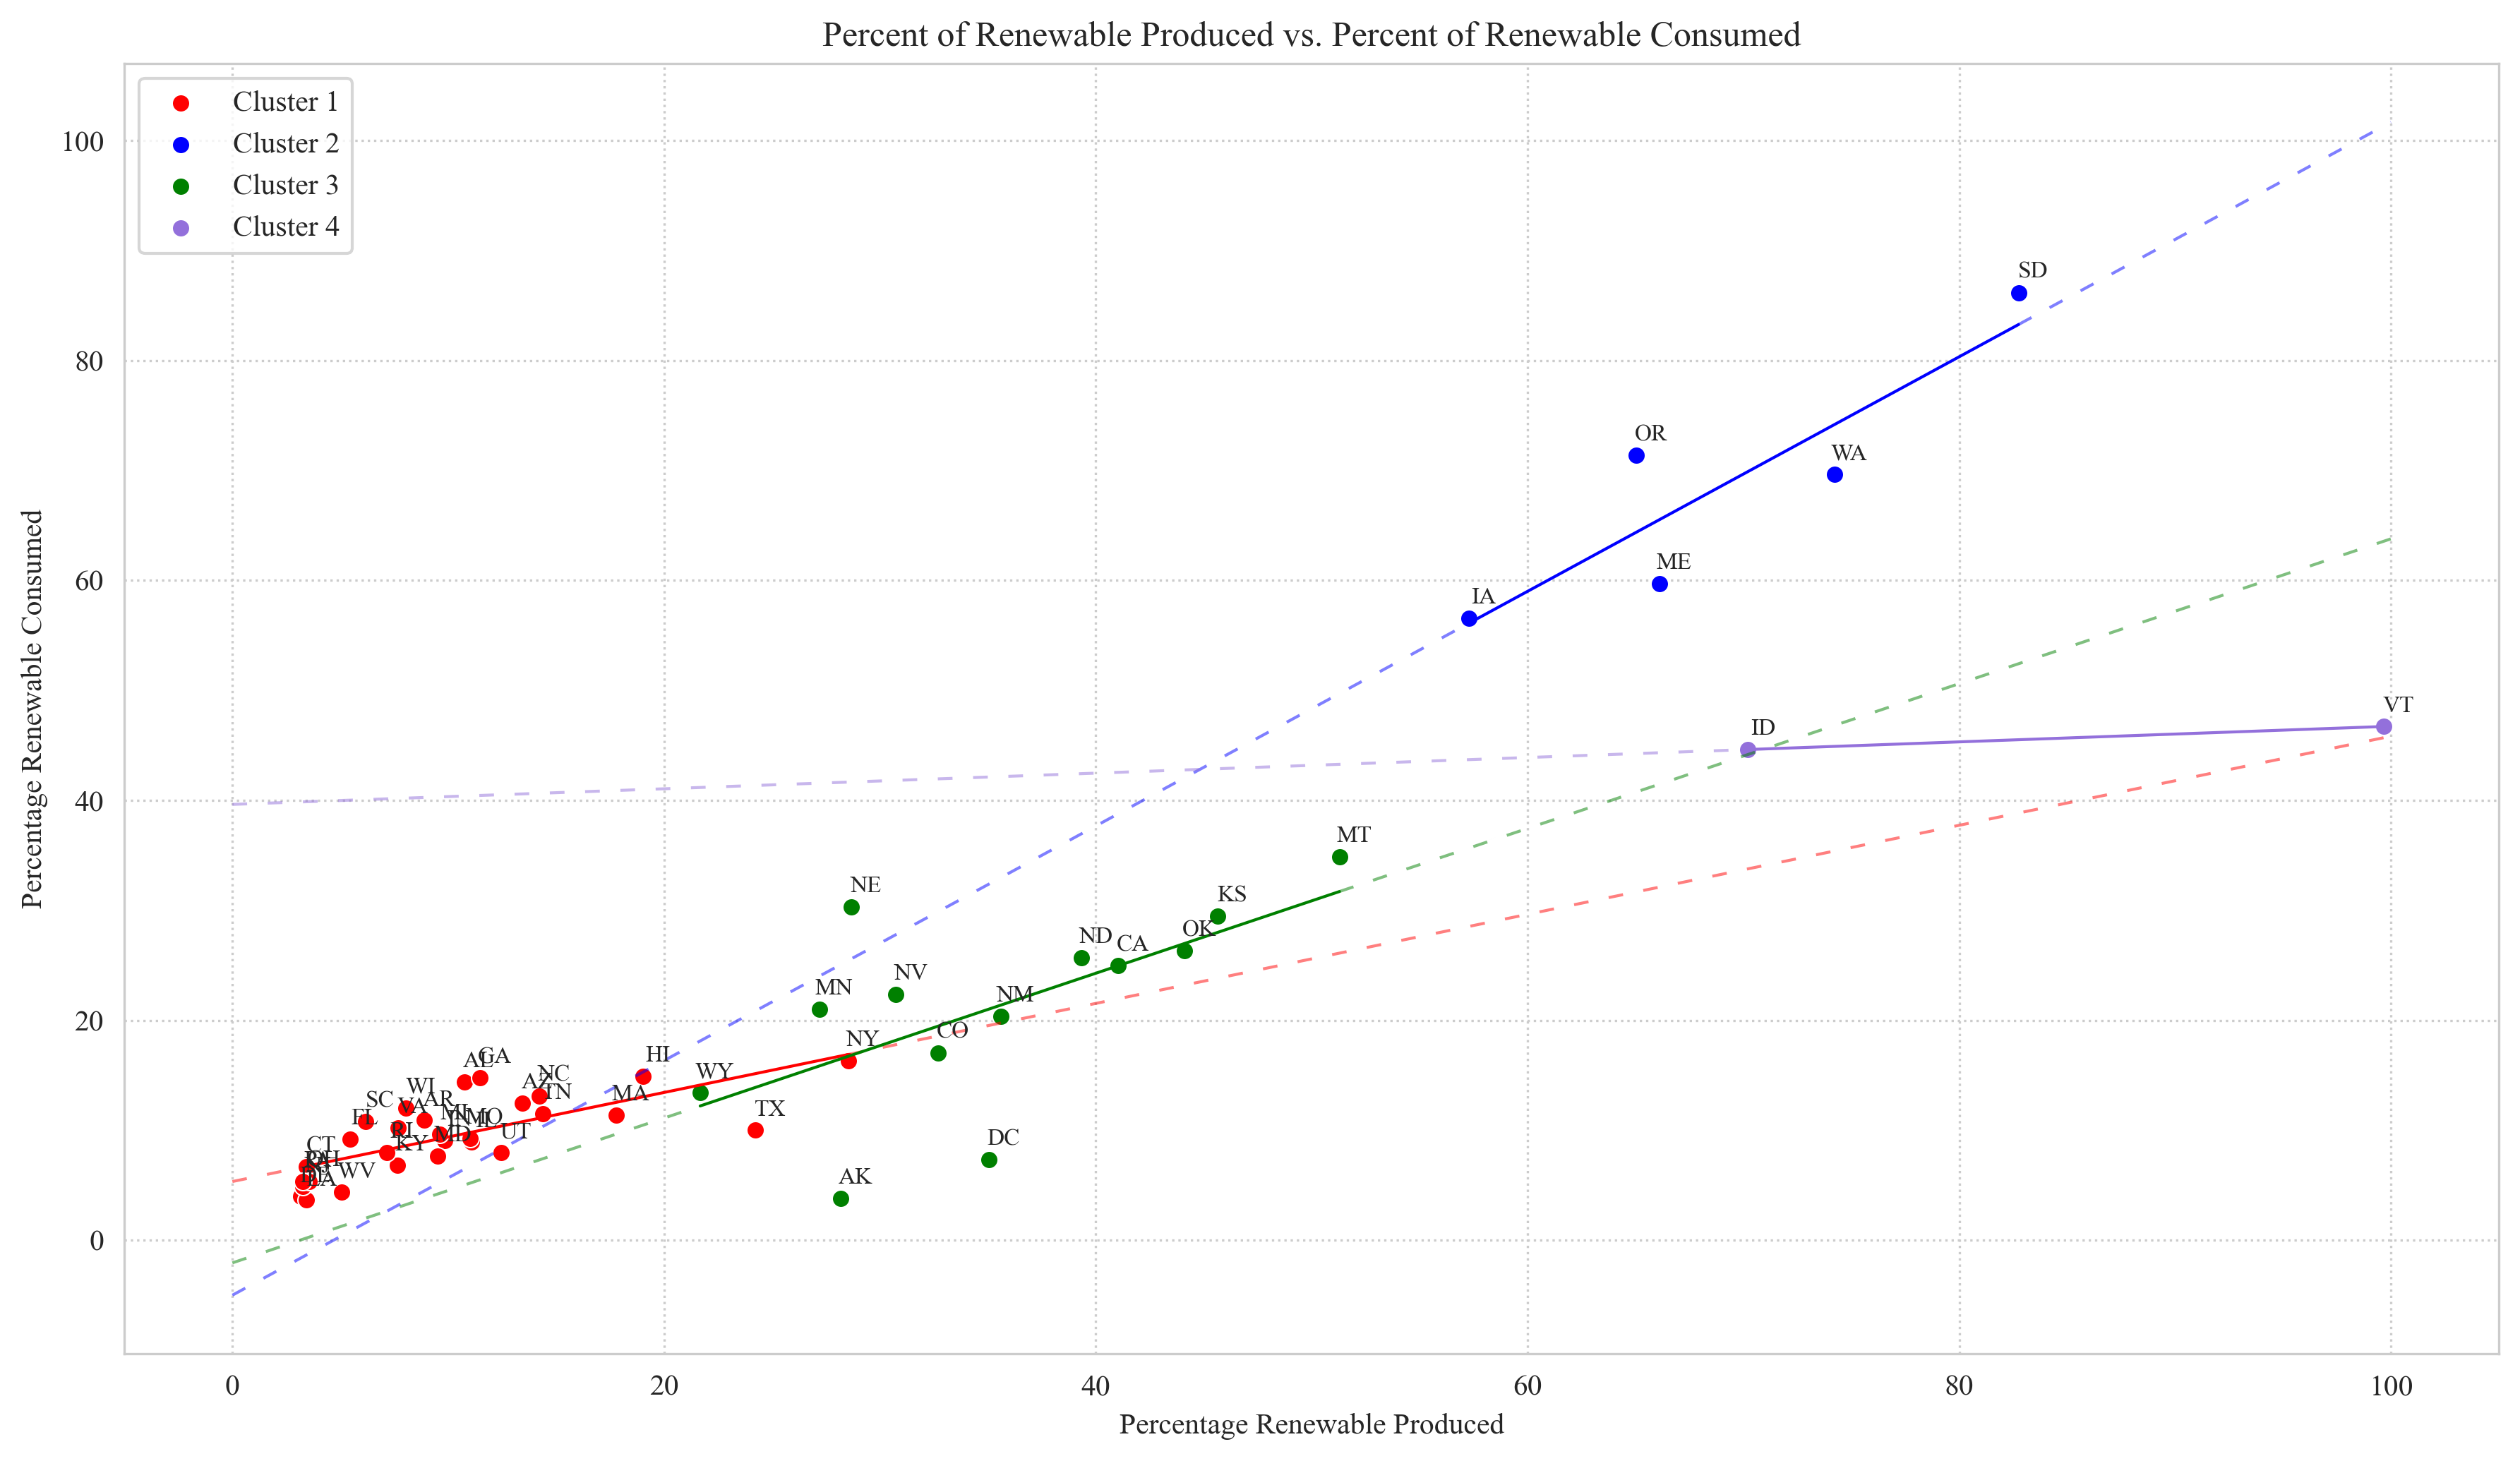

In [379]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Create a figure and axis with DPI set to 300
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

# Scatter plot for all clusters with their specific colors
for cluster_number, color in zip(['1', '2', '3', '4'], ['red', 'blue', 'green', '#9370DB']):  # Light, bluish-purple
    cluster_data = df_combined[df_combined['Pre_Given_Cluster'] == cluster_number]
    sns.scatterplot(x="percentage_renewable_produced", y="percentage_renewable_consumed", data=cluster_data, color=color, label=f'Cluster {cluster_number}', alpha=1.0, ax=ax)

    # Annotate each state in the cluster
    for state, x, y in zip(cluster_data["State"], cluster_data["percentage_renewable_produced"], cluster_data["percentage_renewable_consumed"]):
        ax.annotate(state, (x, y), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8)

# Plotting regression lines for each pre-given cluster without the scatter to avoid duplication
for cluster_number, color in zip(['1', '2', '3', '4'], ['red', 'blue', 'green', '#9370DB']):  # Light, bluish-purple
    cluster_data = df_combined[df_combined['Pre_Given_Cluster'] == cluster_number]
    z = np.polyfit(cluster_data["percentage_renewable_produced"], cluster_data["percentage_renewable_consumed"], 1)
    p = np.poly1d(z)
    
    # Define the normal range for this cluster
    normal_range = (cluster_data["percentage_renewable_produced"].min(), cluster_data["percentage_renewable_produced"].max())
    
    # Plot the line within the normal range with decreased linewidth
    ax.plot(np.linspace(normal_range[0], normal_range[1], 100), p(np.linspace(normal_range[0], normal_range[1], 100)), color=color, alpha=1.0, linewidth=1.0)
    
    # Plot the line outside of the normal range with dashed style, reduced alpha, and decreased linewidth
    ax.plot(np.linspace(0, normal_range[0], 100), p(np.linspace(0, normal_range[0], 100)), color=color, alpha=0.5, linestyle=(0, (5, 7)), linewidth=1.0)
    ax.plot(np.linspace(normal_range[1], 100, 100), p(np.linspace(normal_range[1], 100, 100)), color=color, alpha=0.5, linestyle=(0, (5, 7)), linewidth=1.0)

# Enable minor ticks
ax.minorticks_on()

# Enable major grid lines
ax.grid(which='major', linestyle='dotted')

ax.set_title('Percent of Renewable Produced vs. Percent of Renewable Consumed')
ax.set_xlabel('Percentage Renewable Produced')
ax.set_ylabel('Percentage Renewable Consumed')
plt.legend()
plt.tight_layout()
plt.show()

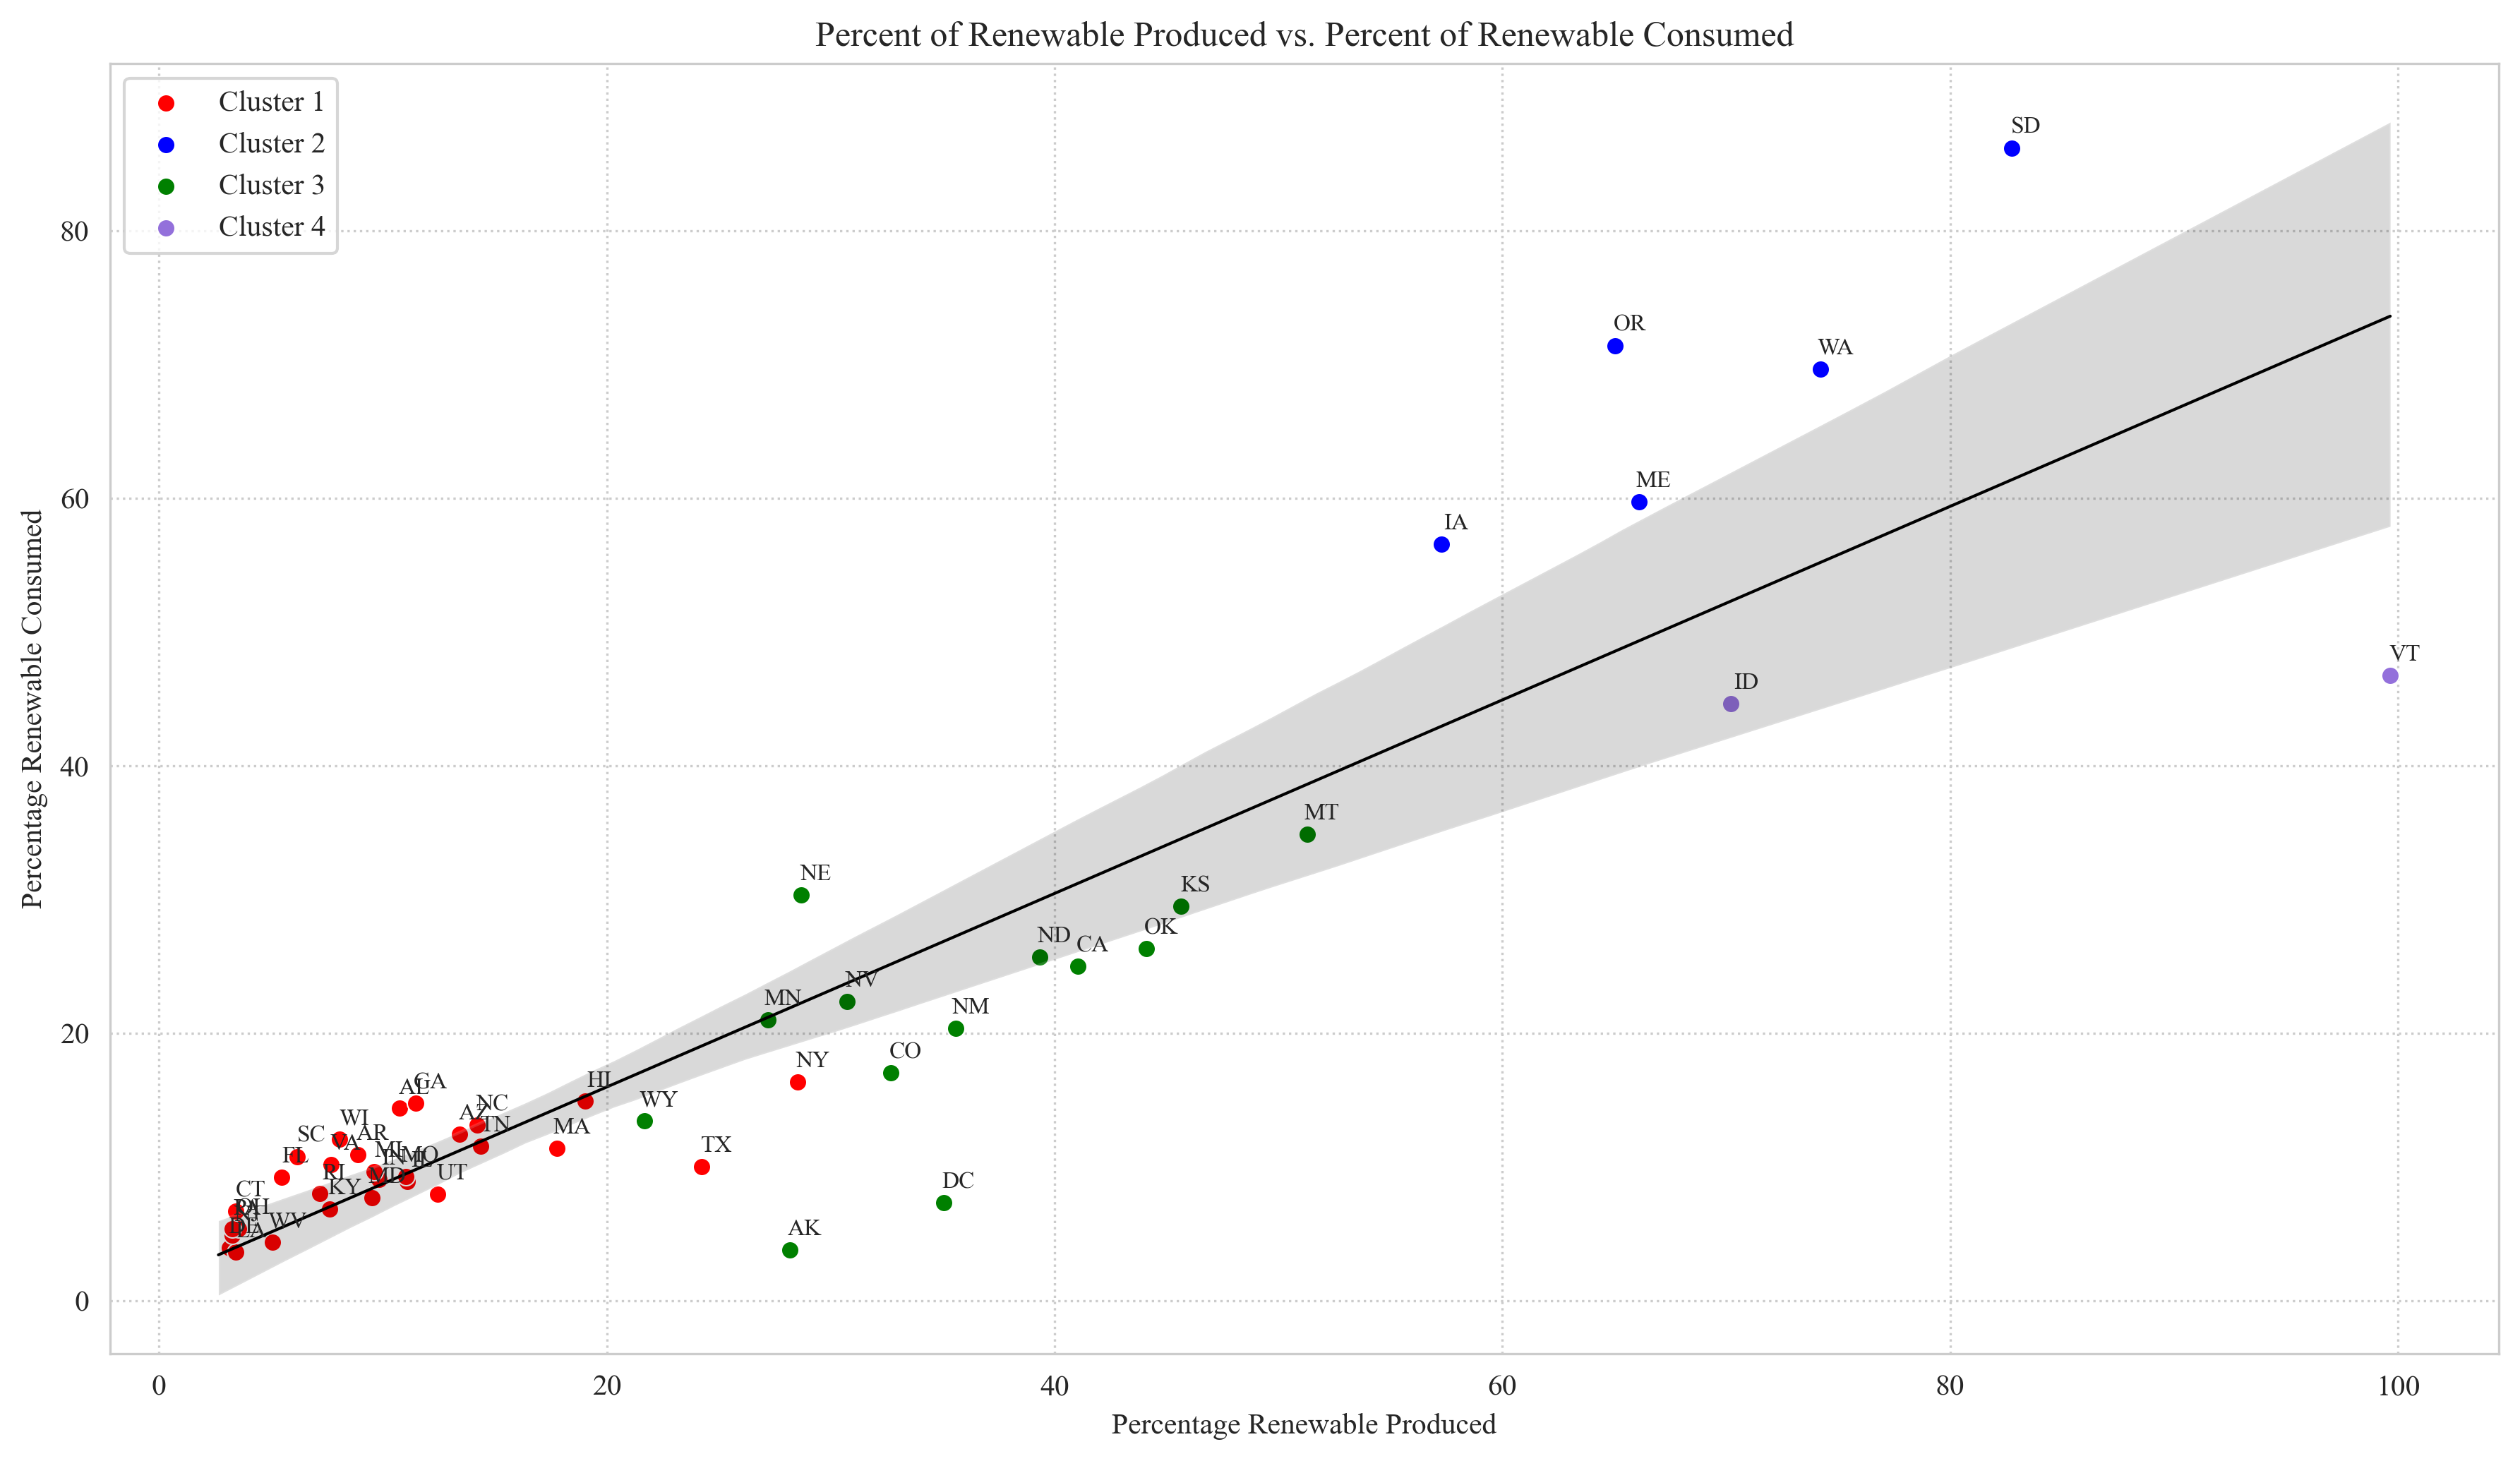

In [380]:
# Create a figure and axis with DPI set to 300
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

# Scatter plot for all clusters with their specific colors
for cluster_number, color in zip(['1', '2', '3', '4'], ['red', 'blue', 'green', '#9370DB']):  # Light, bluish-purple
    cluster_data = df_combined[df_combined['Pre_Given_Cluster'] == cluster_number]
    sns.scatterplot(x="percentage_renewable_produced", y="percentage_renewable_consumed", data=cluster_data, color=color, label=f'Cluster {cluster_number}', alpha=1.0, ax=ax)

    # Annotate each state in the cluster
    for state, x, y in zip(cluster_data["State"], cluster_data["percentage_renewable_produced"], cluster_data["percentage_renewable_consumed"]):
        ax.annotate(state, (x, y), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8)

# Perform regression on all the states with confidence interval contour
sns.regplot(x="percentage_renewable_produced", y="percentage_renewable_consumed", data=df_combined, color='black', scatter=False, line_kws={'linewidth': 1}, ax=ax)

# Enable minor ticks
ax.minorticks_on()

# Enable major grid lines
ax.grid(which='major', linestyle='dotted')

ax.set_title('Percent of Renewable Produced vs. Percent of Renewable Consumed')
ax.set_xlabel('Percentage Renewable Produced')
ax.set_ylabel('Percentage Renewable Consumed')

# Move the legend to the top left
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()